In [8]:
from google.colab import drive

drive.mount('/content/drive')

%cd drive/MyDrive/Colab Notebooks
#! ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('data_model.csv')
df.shape

(8712, 26)

In [10]:
df_trainA = df.sample(frac=0.7, random_state=44)
df_val_testA = df.drop(df_trainA.index).reset_index(drop=True)
df_valA = df_val_testA.sample(frac=0.5, random_state=44)
df_testA = df_val_testA.drop(df_valA.index).reset_index(drop=True)
df_trainA = df_trainA.reset_index(drop=True)
df_valA = df_valA.reset_index(drop=True)

print(df_trainA.shape, df_valA.shape, df_testA.shape)

(6098, 26) (1307, 26) (1307, 26)


In [11]:
df_train = df_trainA[['label', 'comment_text']]
df_val = df_valA[['label', 'comment_text']]
df_test = df_testA[['label', 'comment_text']]
df_train.head()

,label,comment_text
0,0,What would the expression be for the number of...
1,0,"So after i subtracted 11 from both sides, i go..."
2,0,you have to plug 3 in for x then solve the pro...
3,1,ok that was like a brain fart i should have kn...
4,0,"Well, since you are solving for x go ahead and..."


In [12]:
Xtrain = df_train['comment_text'].tolist()

In [16]:
Xval = df_val['comment_text'].tolist()
Xtest = df_test['comment_text'].tolist()

In [21]:
ytrain = df_train['label'].to_numpy()

In [24]:
yval = df_val['label'].to_numpy()
ytest = df_test['label'].to_numpy()

In [23]:
ytrain.shape

(6098,)

In [14]:
len(Xtrain)

6098

In [15]:
Xtrain[0]

'What would the expression be for the number of words Neil types? '

In [1]:
!pip install SHAP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.1 MB/s eta 0:00:00


In [2]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [26]:
vectorizer = TfidfVectorizer(min_df=10)
X_train_vec = vectorizer.fit_transform(Xtrain).toarray()
X_test_vec = vectorizer.transform(Xtest).toarray()

print(len(ytrain), len([t for t in ytrain if t]))
print(len(ytest), len([t for t in ytest if t]))

6098 2598
1307 554


In [27]:
#X_train_vec
X_train_vec.shape

(6098, 1076)

In [28]:
model = RandomForestClassifier()
model.fit(X_train_vec, ytrain)

RandomForestClassifier()

In [154]:
y_pred_test = model.predict(X_test_vec)

In [155]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acc_test = accuracy_score(ytest, y_pred_test)
recall_test = recall_score(ytest, y_pred_test)
prec_test = precision_score(ytest, y_pred_test)
f1_test = f1_score(ytest, y_pred_test)

print('acc:', acc_test)

acc: 0.8806426931905126


In [156]:
print(recall_test, prec_test, f1_test)

0.8122743682310469 0.896414342629482 0.8522727272727273


In [29]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['10', '100', '11', ..., 'yourself', 'yup', 'zero'], dtype=object)

In [30]:
feature_names.shape

(1076,)

In [31]:
explainer = shap.Explainer(model, X_train_vec, feature_names=feature_names)
shap_values = explainer(X_test_vec)
print(shap_values.values.shape)

 99%|===================| 2600/2614 [02:37<00:00]       

(1307, 1076, 2)


inbox me yakelin ill show u my fist 1+1=2 fist in your mouth



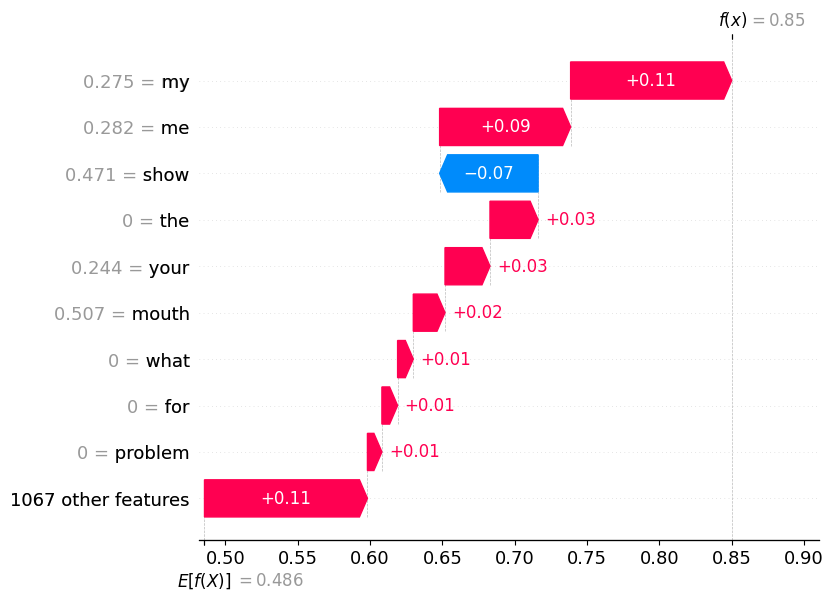

In [32]:
shap.initjs()

ind = 6
print(Xtest[ind])
# inbox me yakelin ill show u my fist 1+1=2 fist in your mouth

shap.plots.waterfall(shap_values[ind,:,1])

this is stupid. stop spamming  &quot;hello is anyone there&quot; messages. if you are seriously that lonely, i recommend CLOSING YOUR COMPUTER AND GOING OUTSIDE.


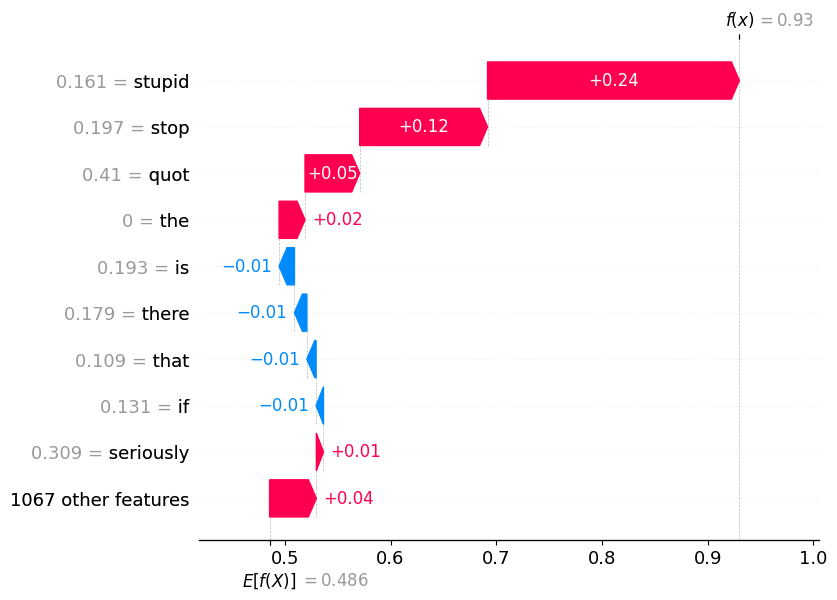

In [33]:
shap.initjs()

ind = 122
print(Xtest[ind])
# this is stupid. stop spamming  &quot;hello is anyone there&quot; messages. if you are seriously that lonely, i recommend CLOSING YOUR COMPUTER AND GOING OUTSIDE.

shap.plots.waterfall(shap_values[ind,:,1])

Mateo please just Shut up we are not stupid but you obviously are


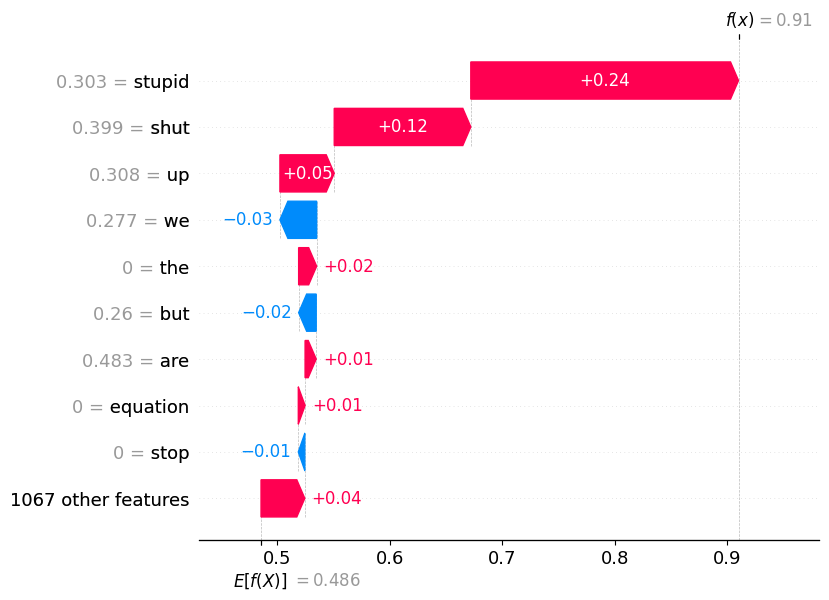

In [34]:
shap.initjs()

ind = 100
print(Xtest[ind])
# Mateo please just Shut up we are not stupid but you obviously are
shap.plots.waterfall(shap_values[ind,:,1])

Can you post a problem that we can work together?


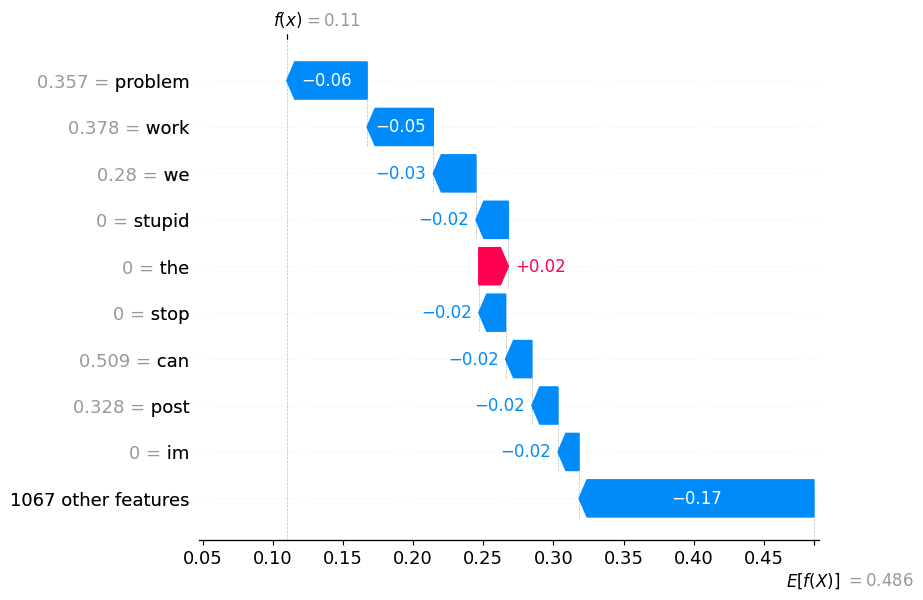

In [152]:
shap.initjs()   ## load JS visualization code to notebook

ind = 1300
print(Xtest[ind])
#
shap.plots.waterfall(shap_values[ind,:,1])

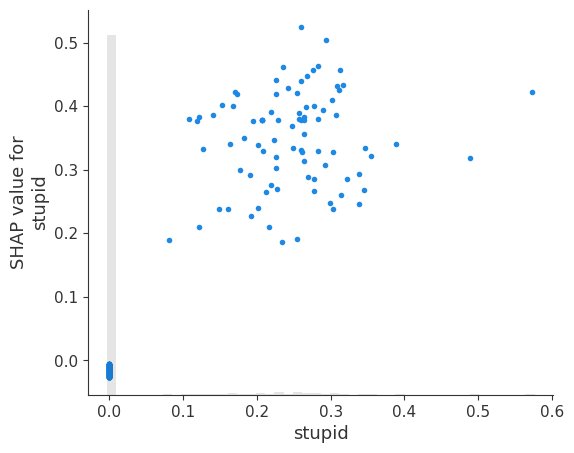

In [76]:
shap.plots.scatter(shap_values[:,feature_names.tolist().index("stupid"),1])

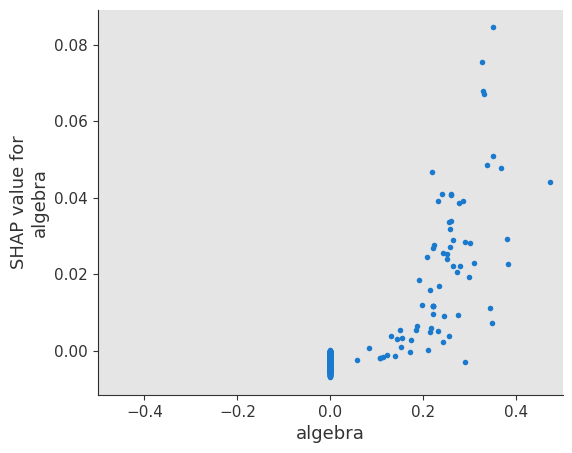

In [82]:
shap.plots.scatter(shap_values[:,feature_names.tolist().index("algebra"),1])

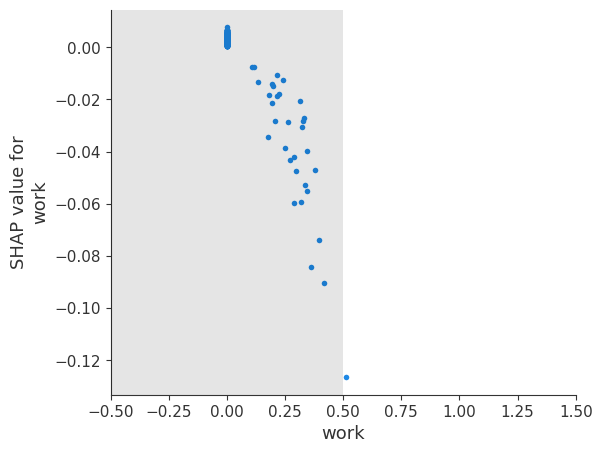

In [153]:
shap.plots.scatter(shap_values[:,feature_names.tolist().index("work"),1])